In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0     #["A10", "B1", "B2", "B52", "C130", "C17", "C5", "E2", "EF2000", "F117", "F14", "F15", "F16", "F18", "F22", "F35", "F4", 
                  #"J20", "JAS39", "MQ9", "Mig31", "Mirage2000", "RQ4", "Rafale", "SR71", "Su57", "Tu160", "Tu95", "U2", "V22", "XB70", "YF23"]
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'A10': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'B1':
            label = 1
        elif labels == 'B2':
            label = 2
        elif labels == 'B52':
            label = 3
        elif labels == 'C130':
            label = 4
        elif labels == 'C17':
            label = 5
        elif labels == 'C5':
            label = 6
        elif labels == 'E2':
            label = 7
        elif labels == 'EF2000':
            label = 8
        elif labels == 'F117':
            label = 9
        elif labels == 'F14':
            label = 10
        elif labels == 'F15':
            label = 11
        elif labels == 'F16':
            label = 12
        elif labels == 'F18':
            label = 13
        elif labels == 'F22':
            label = 14
        elif labels == 'F35':
            label = 15
        elif labels == 'F4':
            label = 16
        elif labels == 'J20':
            label = 17
        elif labels == 'JAS39':
            label = 18
        elif labels == 'MQ9':
            label = 19
        elif labels == 'Mig31':
            label = 20
        elif labels == 'Mirage2000':
            label = 21
        elif labels == 'RQ4':
            label = 22
        elif labels == 'Rafale':
            label = 23
        elif labels == 'SR71':
            label = 24
        elif labels == 'Su57':
            label = 25
        elif labels == 'Tu160':
            label = 26
        elif labels == 'Tu95':
            label = 27
        elif labels == 'U2':
            label = 28
        elif labels == 'V22':
            label = 29
        elif labels == 'XB70':
            label = 30
        elif labels == 'YF23':
            label = 31
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            if type(image) is np.ndarray:
              if image.size == 0:
                continue
            if image is None:
              continue
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:"A10", 1:"B1", 2:"B2", 3:"B52", 4:"C130", 5:"C17", 6:"C5", 7:"E2", 8:"EF2000", 9:"F117", 10:"F14", 
              11:"F15", 12:"F16", 13:"F18", 14:"F22", 15:"F35", 16:"F4",17:"J20", 18:"JAS39", 19:"MQ9", 20:"Mig31", 
              21:"Mirage2000", 22:"RQ4", 23:"Rafale", 24:"SR71", 25:"Su57", 26:"Tu160", 27:"Tu95", 28:"U2", 29:"V22", 
              30:"XB70", 31:"YF23"}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('/content/drive/MyDrive/Colab Notebooks/data2/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (2191, 150, 150, 3)
Shape of Labels: (2191,)


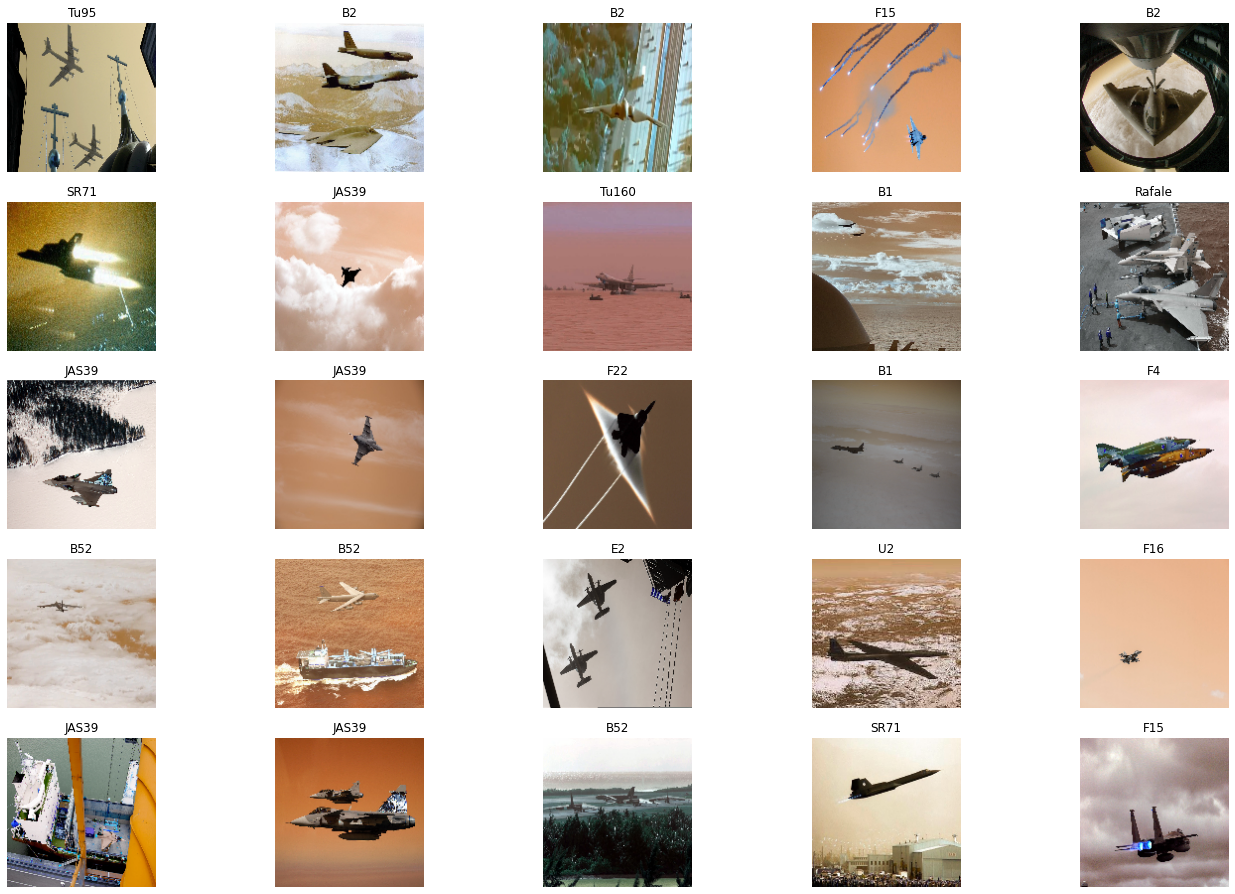

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

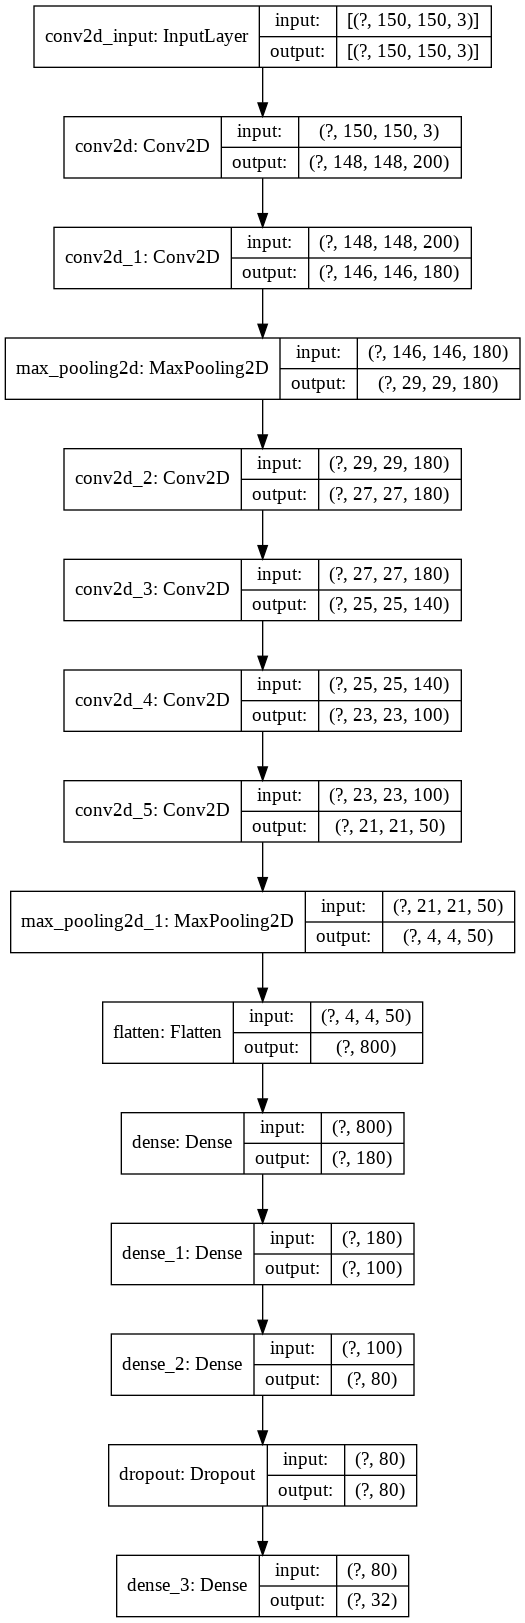

In [6]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(80,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(32,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [7]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
48/48 [==============================] - 14s 294ms/step - loss: 3.9045 - accuracy: 0.0294 - val_loss: 3.4662 - val_accuracy: 0.0365
Epoch 2/35
48/48 [==============================] - 12s 250ms/step - loss: 3.4821 - accuracy: 0.0404 - val_loss: 3.4543 - val_accuracy: 0.0441
Epoch 3/35
48/48 [==============================] - 12s 253ms/step - loss: 3.4689 - accuracy: 0.0470 - val_loss: 3.4562 - val_accuracy: 0.0410
Epoch 4/35
48/48 [==============================] - 12s 255ms/step - loss: 3.4662 - accuracy: 0.0444 - val_loss: 3.4430 - val_accuracy: 0.0653
Epoch 5/35
48/48 [==============================] - 12s 258ms/step - loss: 3.4465 - accuracy: 0.0502 - val_loss: 3.4381 - val_accuracy: 0.0502
Epoch 6/35
48/48 [==============================] - 12s 259ms/step - loss: 3.4419 - accuracy: 0.0470 - val_loss: 3.4089 - val_accuracy: 0.0805
Epoch 7/35
48/48 [==============================] - 13s 261ms/step - loss: 3.4154 - accuracy: 0.0581 - val_loss: 3.4089 - val_accuracy: 0.0562

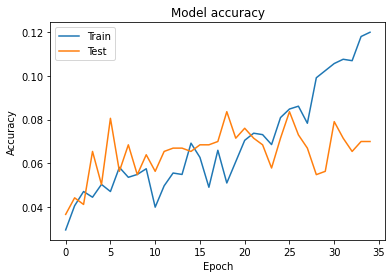

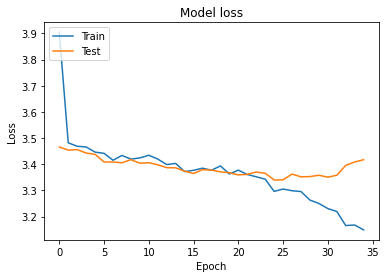

In [9]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [10]:
test_images,test_labels = get_images('/content/drive/MyDrive/Colab Notebooks/data2/test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

18/18 [==============================] - 2s 99ms/step - loss: 3.3891 - accuracy: 0.0705


[3.389087438583374, 0.07054673880338669]

In [11]:
pred_images,no_labels = get_images('/content/drive/MyDrive/Colab Notebooks/data2/test/')
pred_images = np.array(pred_images)
pred_images.shape

(567, 150, 150, 3)

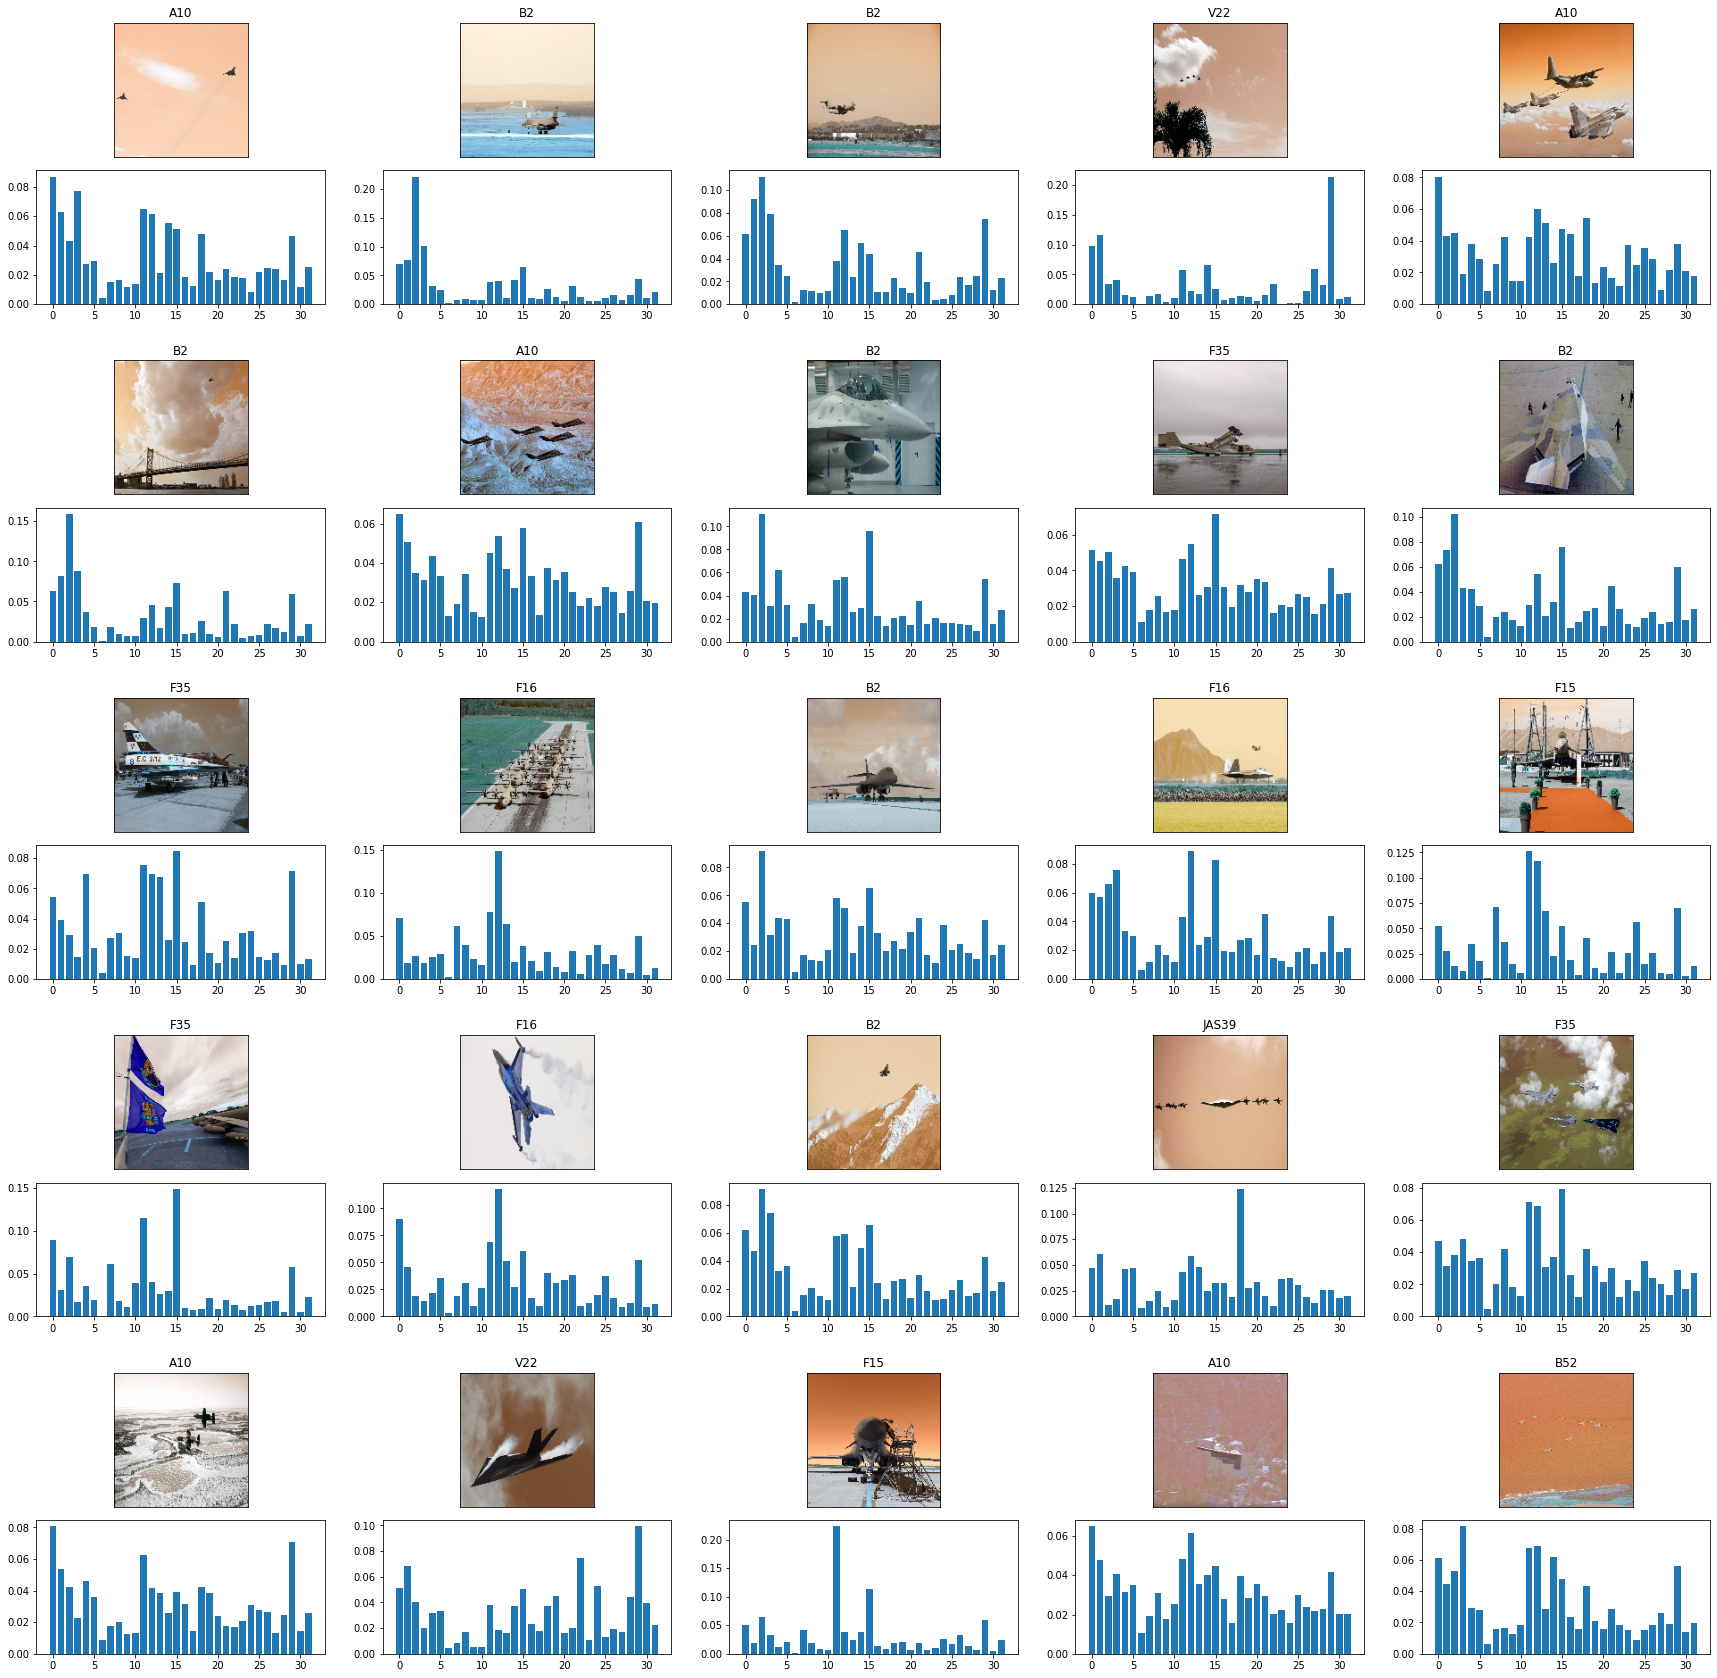

In [14]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(32)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                    20,21,22,23,24,25,26,27,28,29,30,31],pred_prob)
            fig.add_subplot(ax)


fig.show()